In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams['figure.figsize'] = 16,16

from scipy.ndimage.interpolation import zoom
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.models import load_model

import tensorflow as tf
import numpy as np
import os
import logging

#PREVENT ERROR UNCESSARY MESSAGES
tf.get_logger().setLevel(logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

Using TensorFlow backend.


In [2]:
import gradcamutils2

In [3]:
model = load_model('weights/Both_baselines/Both-Baseline_InceptionResNetV2.h5')
print("The InceptionResNetV2 Baseline Weights are Loaded")

The InceptionResNetV2 Baseline Weights are Loaded


In [4]:
model.summary()

Model: "inceptionresnetv2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________

conv2d_157 (Conv2D)             (None, 17, 17, 256)  278528      block17_20_ac[0][0]              
__________________________________________________________________________________________________
conv2d_159 (Conv2D)             (None, 17, 17, 256)  278528      block17_20_ac[0][0]              
__________________________________________________________________________________________________
conv2d_162 (Conv2D)             (None, 17, 17, 288)  663552      activation_161[0][0]             
__________________________________________________________________________________________________
batch_normalization_157 (BatchN (None, 17, 17, 256)  768         conv2d_157[0][0]                 
__________________________________________________________________________________________________
batch_normalization_159 (BatchN (None, 17, 17, 256)  768         conv2d_159[0][0]                 
__________________________________________________________________________________________________
batch_norm

conv2d_182 (Conv2D)             (None, 8, 8, 224)    129024      activation_181[0][0]             
__________________________________________________________________________________________________
batch_normalization_182 (BatchN (None, 8, 8, 224)    672         conv2d_182[0][0]                 
__________________________________________________________________________________________________
activation_182 (Activation)     (None, 8, 8, 224)    0           batch_normalization_182[0][0]    
__________________________________________________________________________________________________
conv2d_180 (Conv2D)             (None, 8, 8, 192)    399360      block8_4_ac[0][0]                
__________________________________________________________________________________________________
conv2d_183 (Conv2D)             (None, 8, 8, 256)    172032      activation_182[0][0]             
__________________________________________________________________________________________________
batch_norm

image\CXR_normal.jpg


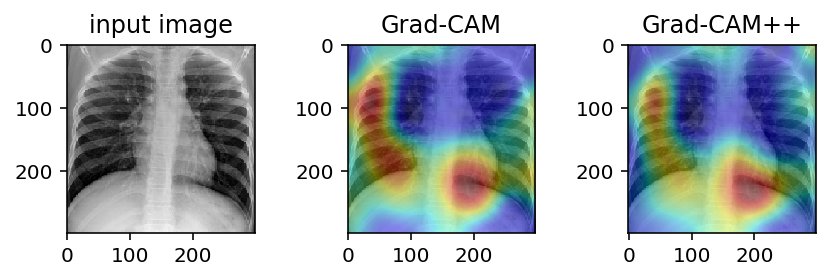

In [5]:
paths = ["CXR_normal.jpg"]

for path in paths:
    path = os.path.join("image",path)
    orig_img = np.array(load_img(path,target_size=(299,299)),dtype=np.uint8)
    img = np.array(load_img(path,target_size=(299,299)),dtype=np.float64)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    predictions = model.predict(img)
    
    gradcam=gradcamutils2.grad_cam(model,img,layer_name='conv_7b')
    gradcamplus=gradcamutils2.grad_cam_plus(model,img,layer_name='conv_7b_ac')
    print(path)
    fig, ax = plt.subplots(nrows=1,ncols=3)
    plt.subplot(131)
    plt.imshow(orig_img)
    plt.title("input image")
    plt.subplot(132)
    plt.imshow(orig_img)
    plt.imshow(gradcam,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM")
    plt.subplot(133)
    plt.imshow(orig_img)
    plt.imshow(gradcamplus,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM++")
    plt.tight_layout()
    plt.savefig("gradcam/Both_baselines/InceptionResNetV2/Baseline-InceptionResNetV2-CXR-Normal.tiff", 
                dpi=300, 
                bbox_inches=None, 
                frameon=None,
                pad_inches=0.0)
    plt.show()

image\CXR_covid19.jpg


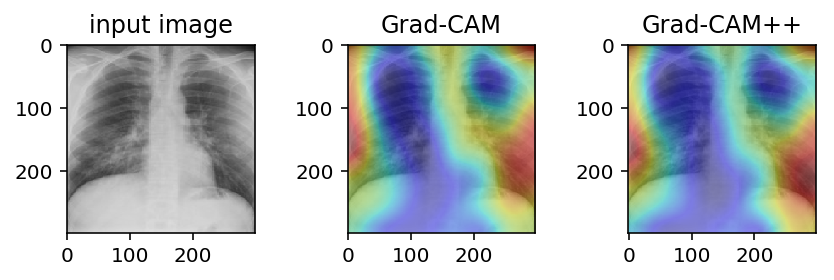

In [6]:
paths = ["CXR_covid19.jpg"]

for path in paths:
    path = os.path.join("image",path)
    orig_img = np.array(load_img(path,target_size=(299,299)),dtype=np.uint8)
    img = np.array(load_img(path,target_size=(299,299)),dtype=np.float64)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    predictions = model.predict(img)
    
    gradcam=gradcamutils2.grad_cam(model,img,layer_name='conv_7b')
    gradcamplus=gradcamutils2.grad_cam_plus(model,img,layer_name='conv_7b_ac')
    print(path)
    fig, ax = plt.subplots(nrows=1,ncols=3)
    plt.subplot(131)
    plt.imshow(orig_img)
    plt.title("input image")
    plt.subplot(132)
    plt.imshow(orig_img)
    plt.imshow(gradcam,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM")
    plt.subplot(133)
    plt.imshow(orig_img)
    plt.imshow(gradcamplus,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM++")
    plt.tight_layout()
    plt.savefig("gradcam/Both_baselines/InceptionResNetV2/Baseline-InceptionResNetV2-CXR-COVID19.tiff", 
                dpi=300, 
                bbox_inches=None, 
                frameon=None,
                pad_inches=0.0)
    plt.show()

image\CXR_cap.jpg


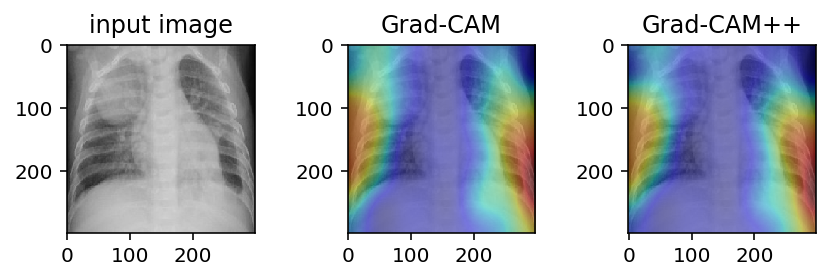

In [7]:
paths = ["CXR_cap.jpg"]

for path in paths:
    path = os.path.join("image",path)
    orig_img = np.array(load_img(path,target_size=(299,299)),dtype=np.uint8)
    img = np.array(load_img(path,target_size=(299,299)),dtype=np.float64)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    predictions = model.predict(img)
    
    gradcam=gradcamutils2.grad_cam(model,img,layer_name='conv_7b')
    gradcamplus=gradcamutils2.grad_cam_plus(model,img,layer_name='conv_7b_ac')
    print(path)
    fig, ax = plt.subplots(nrows=1,ncols=3)
    plt.subplot(131)
    plt.imshow(orig_img)
    plt.title("input image")
    plt.subplot(132)
    plt.imshow(orig_img)
    plt.imshow(gradcam,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM")
    plt.subplot(133)
    plt.imshow(orig_img)
    plt.imshow(gradcamplus,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM++")
    plt.tight_layout()
    plt.savefig("gradcam/Both_baselines/InceptionResNetV2/Baseline-InceptionResNetV2-CXR-Pneumonia.tiff", 
                dpi=300, 
                bbox_inches=None, 
                frameon=None,
                pad_inches=0.0)
    plt.show()

image\CT_normal.jpg


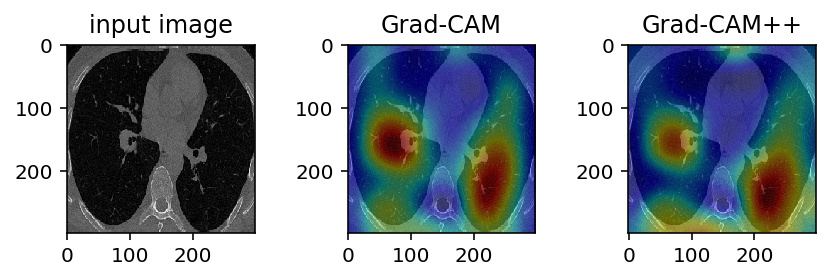

In [8]:
paths = ["CT_normal.jpg"]

for path in paths:
    path = os.path.join("image",path)
    orig_img = np.array(load_img(path,target_size=(299,299)),dtype=np.uint8)
    img = np.array(load_img(path,target_size=(299,299)),dtype=np.float64)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    predictions = model.predict(img)
    
    gradcam=gradcamutils2.grad_cam(model,img,layer_name='conv_7b')
    gradcamplus=gradcamutils2.grad_cam_plus(model,img,layer_name='conv_7b_ac')
    print(path)
    fig, ax = plt.subplots(nrows=1,ncols=3)
    plt.subplot(131)
    plt.imshow(orig_img)
    plt.title("input image")
    plt.subplot(132)
    plt.imshow(orig_img)
    plt.imshow(gradcam,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM")
    plt.subplot(133)
    plt.imshow(orig_img)
    plt.imshow(gradcamplus,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM++")
    plt.tight_layout()
    plt.savefig("gradcam/Both_baselines/InceptionResNetV2/Baseline-InceptionResNetV2-CT-Normal.tiff", 
                dpi=300, 
                bbox_inches=None, 
                frameon=None,
                pad_inches=0.0)
    plt.show()

image\CT_covid19.png


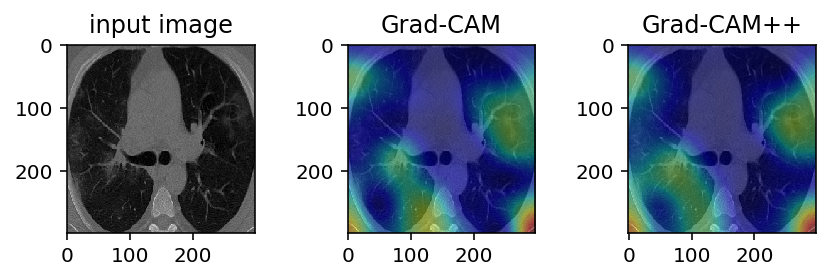

In [10]:
paths = ["CT_covid19.png"]

for path in paths:
    path = os.path.join("image",path)
    orig_img = np.array(load_img(path,target_size=(299,299)),dtype=np.uint8)
    img = np.array(load_img(path,target_size=(299,299)),dtype=np.float64)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    predictions = model.predict(img)
    
    gradcam=gradcamutils2.grad_cam(model,img,layer_name='conv_7b')
    gradcamplus=gradcamutils2.grad_cam_plus(model,img,layer_name='conv_7b_ac')
    print(path)
    fig, ax = plt.subplots(nrows=1,ncols=3)
    plt.subplot(131)
    plt.imshow(orig_img)
    plt.title("input image")
    plt.subplot(132)
    plt.imshow(orig_img)
    plt.imshow(gradcam,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM")
    plt.subplot(133)
    plt.imshow(orig_img)
    plt.imshow(gradcamplus,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM++")
    plt.tight_layout()
    plt.savefig("gradcam/Both_baselines/InceptionResNetV2/Baseline-InceptionResNetV2-CT-COVID19.tiff", 
                dpi=300, 
                bbox_inches=None, 
                frameon=None,
                pad_inches=0.0)
    plt.show()

image\CT_cap.png


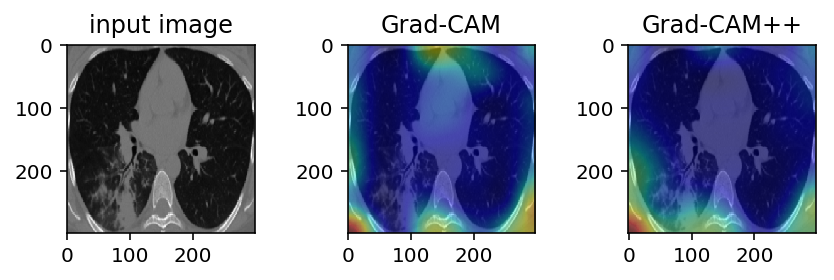

In [11]:
paths = ["CT_cap.png"]

for path in paths:
    path = os.path.join("image",path)
    orig_img = np.array(load_img(path,target_size=(299,299)),dtype=np.uint8)
    img = np.array(load_img(path,target_size=(299,299)),dtype=np.float64)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    predictions = model.predict(img)
    
    gradcam=gradcamutils2.grad_cam(model,img,layer_name='conv_7b')
    gradcamplus=gradcamutils2.grad_cam_plus(model,img,layer_name='conv_7b_ac')
    print(path)
    fig, ax = plt.subplots(nrows=1,ncols=3)
    plt.subplot(131)
    plt.imshow(orig_img)
    plt.title("input image")
    plt.subplot(132)
    plt.imshow(orig_img)
    plt.imshow(gradcam,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM")
    plt.subplot(133)
    plt.imshow(orig_img)
    plt.imshow(gradcamplus,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM++")
    plt.tight_layout()
    plt.savefig("gradcam/Both_baselines/InceptionResNetV2/Baseline-InceptionResNetV2-CT-Pneumonia.tiff", 
                dpi=300, 
                bbox_inches=None, 
                frameon=None,
                pad_inches=0.0)
    plt.show()